# Basis Expansions and Regularization

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Piecewise Polynomials and Splines 

### Example Figure 5.2 and Equotian 5.3

In [35]:
## lets generate an imputvariable stored in x
x = np.arange(0,10,0.1)
y = np.sin(x) 
yNoise = y + np.random.normal(0,0.2,len(x))

In [36]:
## define function for cubic second order continious spline

def cubicSpline(X,ne1,ne2):
    e1 = X[ne1]
    e2 = X[ne2]
    # create basis functions
    M = 6 # number of bases
    basis = np.zeros((M,len(X)))
    basis[0,:] = np.ones(len(X))
    basis[1,:] = X
    basis[2,:] = X**2
    basis[3,:] = X**3
    basis[4,ne1:] = (X[ne1:]-e1)**3
    basis[5,ne2:] = (X[ne2:]-e2)**3
    
    return basis  

def getB(model,y):
    b = np.dot(np.dot(np.linalg.inv(np.dot(model,model.T)),model),y)
    return b 

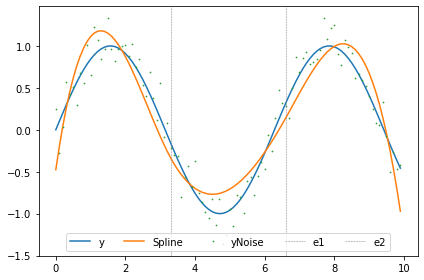

In [49]:
## recreate spline from example (cubic and continous)
# Page 143, Figure 5.2

# calculate splines
# nodes 
ne1 = 33 # number in time array
ne2 = 66

H = cubicSpline(x,ne1,ne2)
b = getB(H,yNoise)

# f(x) = b.T * h
spline = b.reshape(len(b),1) *  H
spline = sum(spline,0)

# plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(x,y)
ax1.plot(x,spline)
ax1.plot(x,yNoise,'o',markersize = 0.7)
ax1.axvline(x[ne1],ls = '--', lw = .5, color = 'C7')
ax1.axvline(x[ne2],ls = '--', lw = .5, color = 'C7')
ax1.legend(['y','Spline','yNoise','e1','e2'], loc = 'lower center', ncol = 5)
plt.tight_layout()
plt.show()



In [43]:
## interactive part - get a feeling for nodes

@interact
def show_articles_more_than(n1=(0, 99, 1), n2=(0, 99, 1)):
    H = cubicSpline(x,n1,n2)
    b = getB(H,yNoise)
    fx = b.reshape(M,1) * H
    fx = sum(fx,0)
    
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.plot(x,y)
    ax3.plot(x,fx)
    ax3.plot(x,yNoise,'o',markersize = 0.7)
    ax3.axvline(t[n1],ls = '--', lw = .5, color = 'C7')
    ax3.axvline(t[n2],ls = '--', lw = .5, color = 'C7')
    return 


interactive(children=(IntSlider(value=49, description='n1', max=99), IntSlider(value=49, description='n2', max…